## Water supply watershed explorer
Queries and maps the NC water supply watersheds and related data.

The data are served here: https://services.nconemap.gov/secure/rest/services/NC1Map_Watersheds/MapServer/2

In [55]:
#Imports
import requests, io
import pandas as pd
import geopandas as gpd
from shapely.geometry import LinearRing
from shapely.geometry import Polygon

import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
#Construct the query
serviceURL = 'https://services.nconemap.gov/secure/rest/services/NC1Map_Watersheds/MapServer/1/query'
params=dict(where="STATES = 'NC'",
            geometryType='esriGeometryEnvelope',
            inSR='',
            spatialRel='esriSpatialRelIntersects',
            outFields='*',
            returnGeometry='true',
            returnTrueCurves='false',
            outSR='',
            returnIdsOnly='false',
            returnCountOnly='false',
            returnZ='false',
            returnM='false',
            returnDistinctValues='false',
            resultOffset='',
            resultRecordCount='',
            f='json')

In [77]:
#Retrive the JSON and extract the features
r = requests.get(serviceURL,params)
features = r.json()['features']
print ("{} features extracted".format(len(features)))

1000 features extracted


In [78]:
#Create a dataframe from the json objects
df = pd.DataFrame(features,columns=('attributes','geometry'))

In [79]:
#Pull the attributes into its own dataframe
dfAttr = df['attributes'].apply(pd.Series)
dfAttr.set_index('OBJECTID',inplace=True)

In [80]:
#Conver rings to polygons
dfGeom = df['geometry'].apply(pd.Series)
dfGeom['Shape'] = dfGeom.apply(lambda x: Polygon(x.rings[0]),axis=1)
dfGeom['X'] = dfGeom['rings'].apply(lambda x: len(x))

In [81]:
#Insert the geometry
dfAttr.insert(0,"geometry",dfGeom['Shape'])

In [82]:
#Check for features with multiple rings
dfGeom[dfGeom['X']>1]

,rings,Shape,X


In [83]:
#Convert the pandas dataFrame to a geopandas data frame
gdf=gpd.GeoDataFrame(dfAttr)
gdf.columns

Index(['geometry', 'ACRES', 'ACRES_1', 'BASIN', 'FID_', 'FIPS_C', 'HUC_10',
       'HUC_12', 'HUC_2', 'HUC_4', 'HUC_6', 'HUC_8', 'HU_10_DS', 'HU_10_GNIS',
       'HU_10_MOD', 'HU_10_NAME', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_GNIS',
       'HU_12_MOD', 'HU_12_NAME', 'HU_12_TYPE', 'HU_8_STATE', 'META_ID',
       'NCONTRB_A', 'REGION', 'SHAPE.area', 'SHAPE.len', 'SQ_MILES', 'STATES',
       'SUBBASIN', 'SUBREGION'],
      dtype='object')

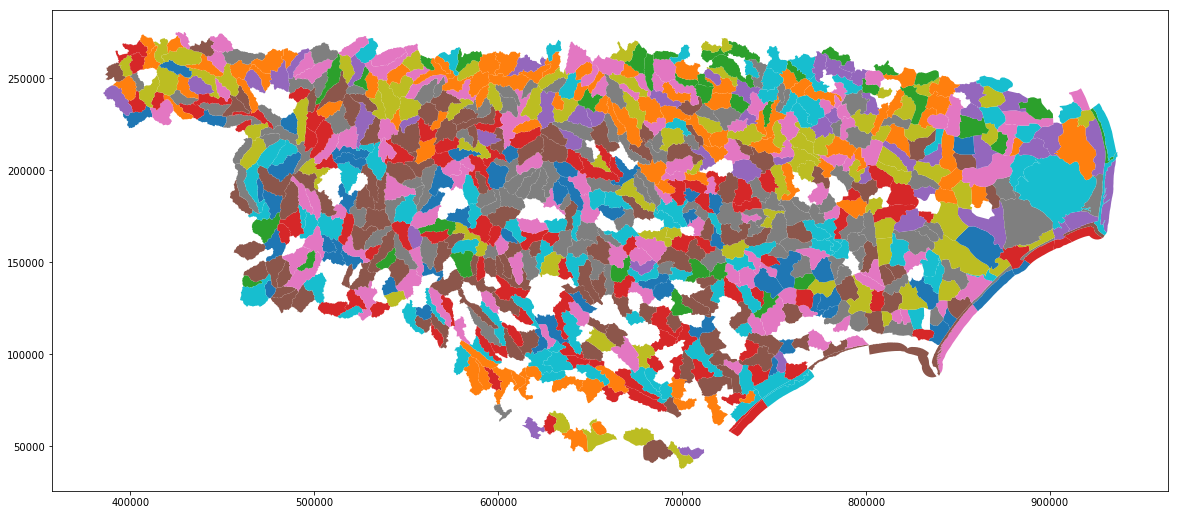

In [84]:
gdf.plot('SUBBASIN',figsize=(20,10));

In [85]:
gdf.iloc[100]

geometry      POLYGON ((678455.8237000033 60350.08379999921,...
ACRES                                                     26727
ACRES_1                                                 1539932
BASIN                                                     Neuse
FID_                                                         48
FIPS_C         37061 37063 37069 37077 37085 37101 37135 371...
HUC_10                                               0302020114
HUC_12                                             030202011403
HUC_2                                                        03
HUC_4                                                      0302
HUC_6                                                    030202
HUC_8                                                  03020201
HU_10_DS                                             0302020117
HU_10_GNIS                                                     
HU_10_MOD                                                    NM
HU_10_NAME                              